<a href="https://colab.research.google.com/github/muhsintsn/Machine-Learning/blob/main/2_ML_Multiple_Linear_Regression_and_Regression_Error_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression and Regression Error Metrics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation 


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Not: mean ve std arasında anlamlı ilişki olmalı

In [ ]:

print(np.mean([100,110,120,115]))
print(np.std([100,110,120,115]))

111.25
7.39509972887452


In [ ]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [ ]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


## Distribution of features

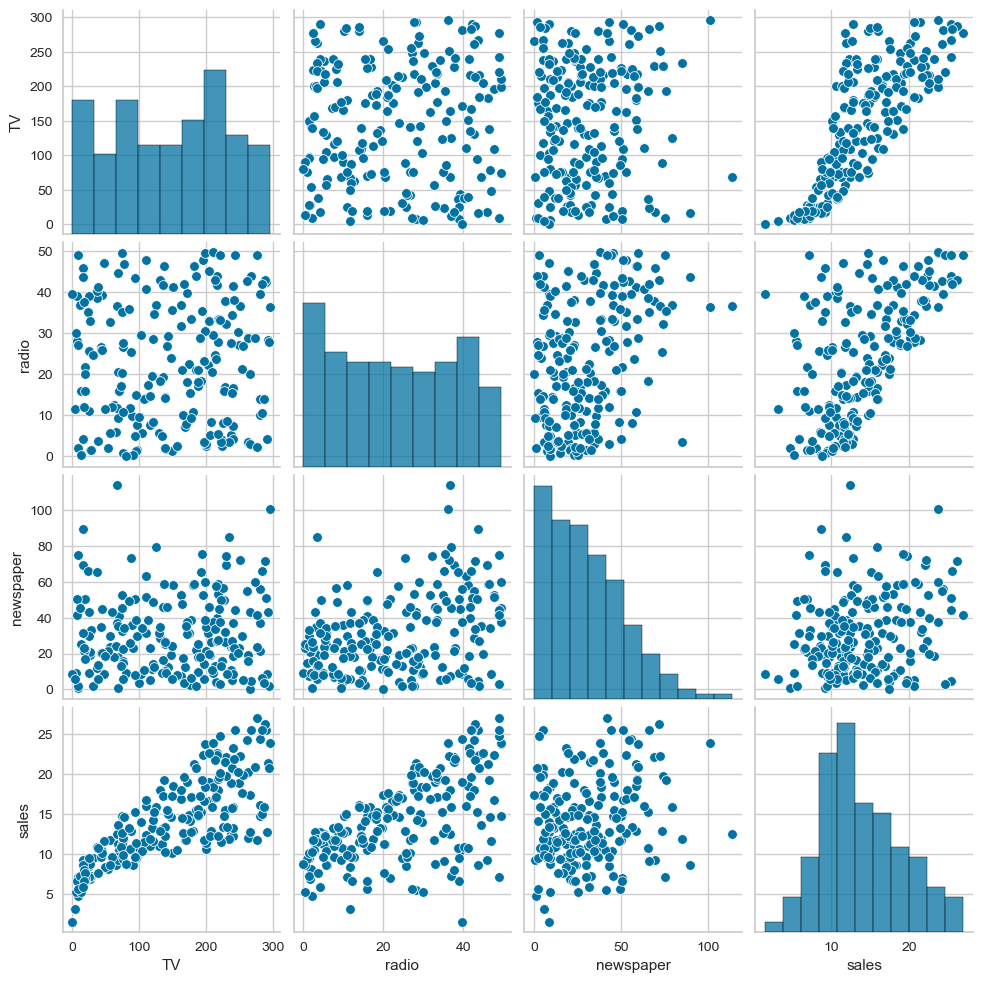

In [ ]:
sns.pairplot(df);
plt.show()

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


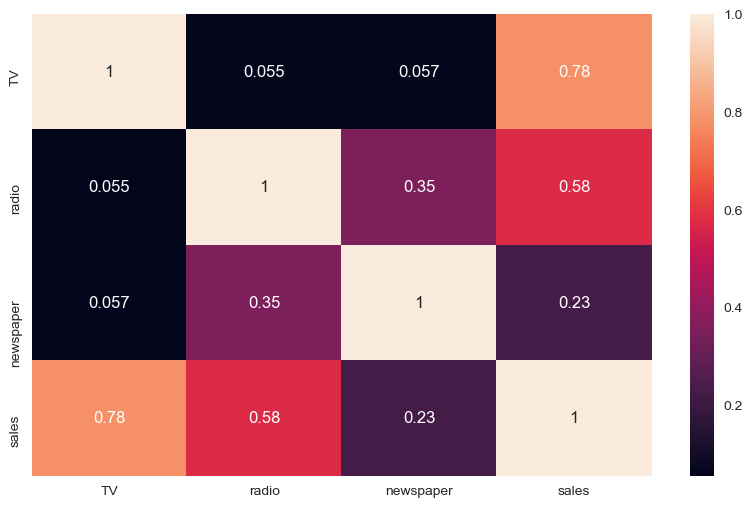

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Train-Test Split 
datayı train ve test olarak bölüyoruz

In [ ]:
X = df.drop(columns ="sales")  # veya df[["TV", "radio", "newspaper"]]
y = df["sales"] # target sütunu

In [ ]:
from sklearn.model_selection import train_test_split # sklearn kütüpaneden ilgili modulü import ederiz


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state =42 )
# datamızı test ve train olarak bölüyoruz. 
#  random_state =42  ekip olarak çalıştığımızda herkesin aynı değerleri (score) randon olarak alabilmesi için yazıyoruz
# test_size=0.3  datanın % kaçını test için ayıracağımızı belirtiyoruz


In [ ]:
df.sample(15)

,TV,radio,newspaper,sales
108,13.1,0.4,25.6,5.3
87,110.7,40.6,63.2,16.0
185,205.0,45.1,19.6,22.6
130,0.7,39.6,8.7,1.6
192,17.2,4.1,31.6,5.9
151,121.0,8.4,48.7,11.6
74,213.4,24.6,13.1,17.0
180,156.6,2.6,8.3,10.5
36,266.9,43.8,5.0,25.4
138,43.0,25.9,20.5,9.6


In [ ]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [ ]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [ ]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [ ]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

modelimizi eğitip test edeceğiz


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression() # modelimi LR ile eğiteceğim için modelime atadım

In [ ]:
model.fit(X_train, y_train) # test datalarını modelime fit ederiz egitiriz. modelimize X_train datası ile y_train'ne göre kendini ğit diyoruz 

LinearRegression()

In [ ]:
y_pred = model.predict(X_test) # X_test i modelde tahmin ediyoruz,  eğitilmişmi diye test edeyoruz sadece X_test'i veririz, y_pred olaak return ederiz
y_pred # tahminlerimiz geldi.

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [ ]:
model.coef_ # tv radio ve newspaper katsayılarını buluyoruz

array([0.04405928, 0.1992875 , 0.00688245])

In [ ]:
model.intercept_ # kesişme X = 0 olduğunda  y'nin ilk başladığı değer 

2.7089490925159048

In [ ]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0   (multi Linear Regression y_pred tahmin formülü )


In [ ]:
sum(X_test.loc[95] * model.coef_) + model.intercept_  

16.56539629743484

In [ ]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test - y_pred} 

In [ ]:
comparing = pd.DataFrame(my_dict) # test sonuçlarını, gerçek değerleri ve arasındaki farklarım olduğu df oluşturuz
comparing

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [ ]:
result_sample = comparing.head(15)
result_sample

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


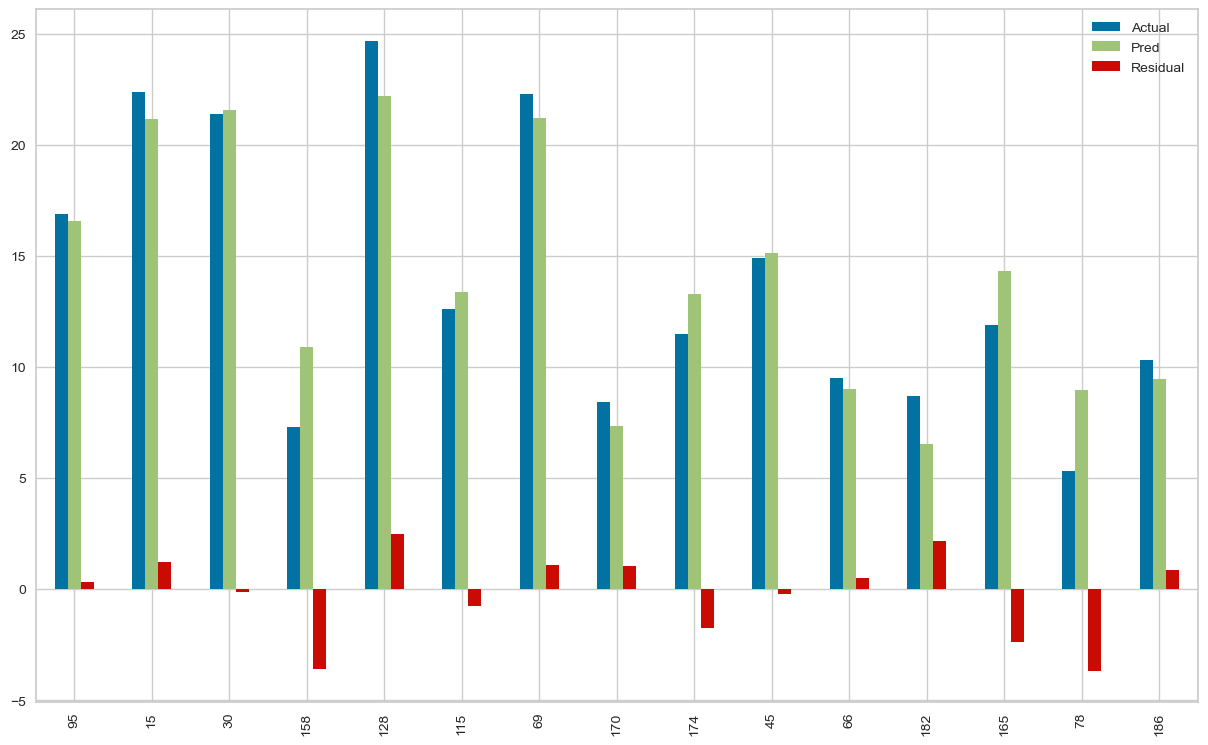

In [ ]:
result_sample.plot(kind= "bar", figsize=(15,9))
plt.show() # sonuçlarımıza grafik olarak bakarız Residual'3 değe anormal görünüyor .genel olarak modelin scoru gerçeğe yakın. 

### Error Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
R2_score = r2_score(y_test, y_pred) #y nin gerçek değerini test için ayırdığım y_test değerini ve
# ve tahmin edilen değeri (pcnin bulduğu değer => y_pred) değerini istiyor.

R2_score # target'taki değişimin ne kadarını açklayabiliyorum(doğru tahmin yapabilmek için gerekli olan bilginin  % 86'sına sahibim)

0.8609466508230367

In [ ]:
mae = mean_absolute_error(y_test, y_pred) # mutlak değer alıp topladıktan sonra gözlen sayısına böler 
mae

1.511669222454909

In [ ]:
mse = mean_squared_error(y_test, y_pred) # residual karesini alıp toplar sonra ortalamasını alır 
# dez avantajı birimlerinde karesini aldığı için yorumlanması zor olur 
mse

3.7967972367152227

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # yukarıdaki mse'nin dezavantajjını gidermek için karekökünü alırız.cezalandırma netleşir. 
rmse

1.9485372043446394

Not: mse ile rmse değerler arasında ciddi fark varsa modelim düzgün çalışmıyor demektir.

In [ ]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [ ]:
mae / sales_mean  # mae salesin ortalaması na bktığımızda hata %10 yani modelim % 90 doğru tahmin yapıyor

0.10780311802138769

In [ ]:
rmse / sales_mean  # rmse salesin ortalamasına baktığımızda hata %13 yani modelim % 87 doğru tahmin yapıyor

0.13895790367941802

### Adjusted R2 score
düzeltilmiş r2 skorudur, feature eklediğimizde gözlem sayısınıda eklememiz gerek, 1 feature ye 10-15 gözlem eklenir, eğer gözlem eklenmezse yalancı iyileşme olur adjR2 Score feature ile observation dengeler. çok fazla kullanımayacak. 
amaç minumum gözlemle maximum sonucu almak.


In [ ]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]  # number of observations
    p = df.shape[1]-1 # number of independent variables (-1 ile bağımlı değişkeni çıksrıyoruz)
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [ ]:
adj_r2(y_test, y_pred, df)

0.8588182832335933

## What is the concept of punishment for RMSE error metric?¶

In [ ]:

variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}

In [ ]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [ ]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
# abs Docstring: Return the absolute value of the argument.builtin_function_or_method

In [ ]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [ ]:
#mae
df_2.residual.sum()/5 #200

200.0

In [ ]:
#rmse
((df_2.residual**2).sum()/5)**0.5 #209.76

209.76176963403032

### eval_metric

In [ ]:
# tek fonksiyonla  bütün errorları return ederiz 
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual,pred)
    print("Model testing performance")
    print("--------------------------")
    print(f"R_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
eval_metric(y_test, y_pred)

Model testing performance
--------------------------
R_score 	: 0.8609466508230367
MAE 		: 1.511669222454909
MSE 		: 3.7967972367152227
RMSE 		: 1.9485372043446394


## önemli:
y_train_pred = model.predict(X_train)    
 * burada yaptığımız.modelimin ne kadar iyi sonuç verdiğini görmek için modelimi eğittiğim data ile kontrol ediiyoruz.
çıkan sonuç ile tahmindeki sonuçlar yakınsa modelim iyi düzgün çalışıyor genelleme yapabiliyor yani ezberlememiş.

In [ ]:
y_train_pred = model.predict(X_train) # burada yaptığımız.modelimin ne kadar iyi sonuç verdiğini görmek için modelimi eğittiğim data ile kontrol ediiyoruz.
# çıkan sonuç ile tahmindeki sonuçlar yakınsa modelim iyi düzgün çalışıyor genelleme yapabiliyor yani ezberlememiş.

In [ ]:
eval_metric(y_train, y_train_pred)

Model testing performance
--------------------------
R_score 	: 0.9055159502227753
MAE 		: 1.1581502948072528
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?¶
https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

### Plotting residuals

bir datanın LR uygun olup olmadığına bakmak için residual'ın normal dağılıma yakın olup olmadığı bakarız. 0 çizgisinin hem altında ve üstündeki bölgeye gözlemler eşit dağılmış olacak ve rasgele dağılım olması gerekir. bağımsız değişken ve target dağılımlar aynıysa skorları iyileştirir. 

In [ ]:
residuals = y_test-y_pred

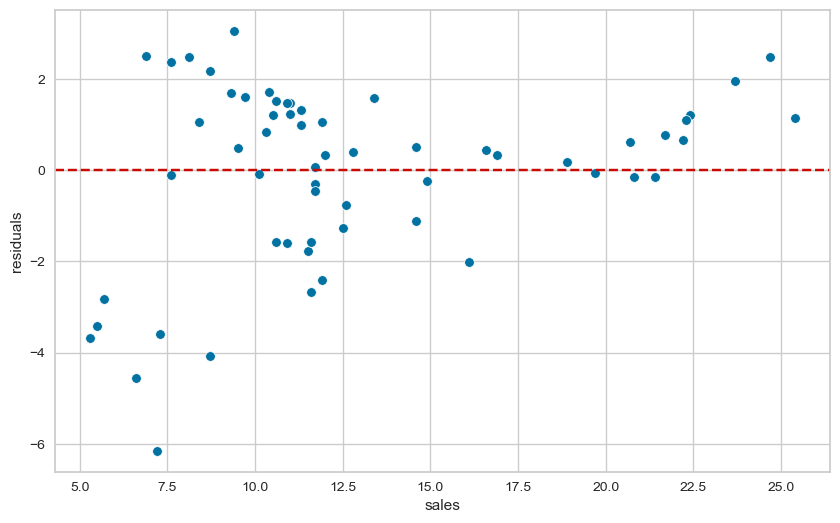

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

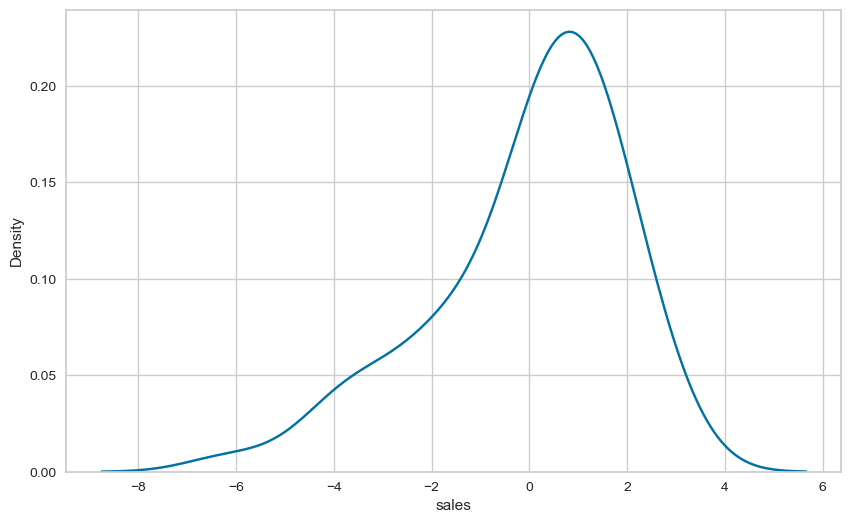

In [ ]:
sns.kdeplot(residuals)
plt.show()

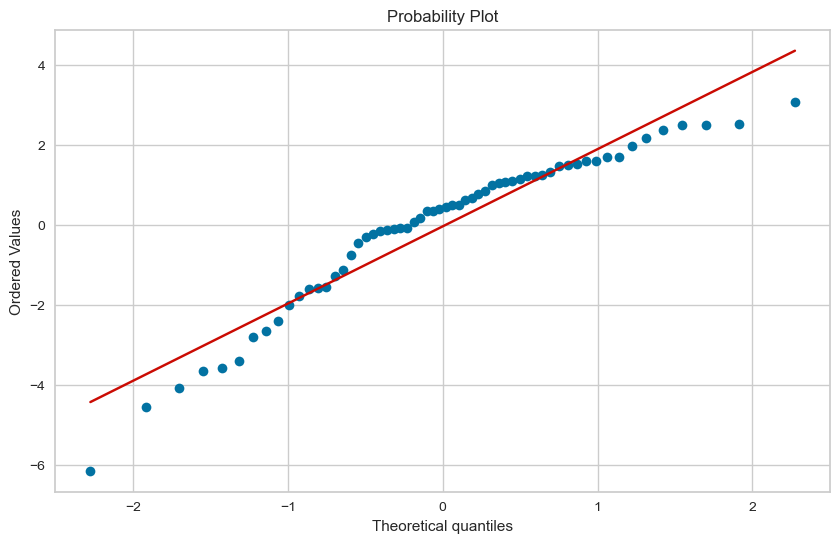

In [ ]:
stats.probplot(residuals, dist ="norm", plot =plt); #  stats kütüpanesinin içinde dagılım grafiği probplot ile çizdiğimizde dağılımlar 
                                                    # çizgiyi sarmalıyorsa dağılım normaldir 
plt.show()

In [ ]:
from scipy .stats import skew
skew(residuals)

-0.9865673346742728

In [ ]:
pip install yellowbrick # Ml' kullanılan görselleştirme kütüpanesi

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [ ]:
from yellowbrick.regressor import ResidualsPlot

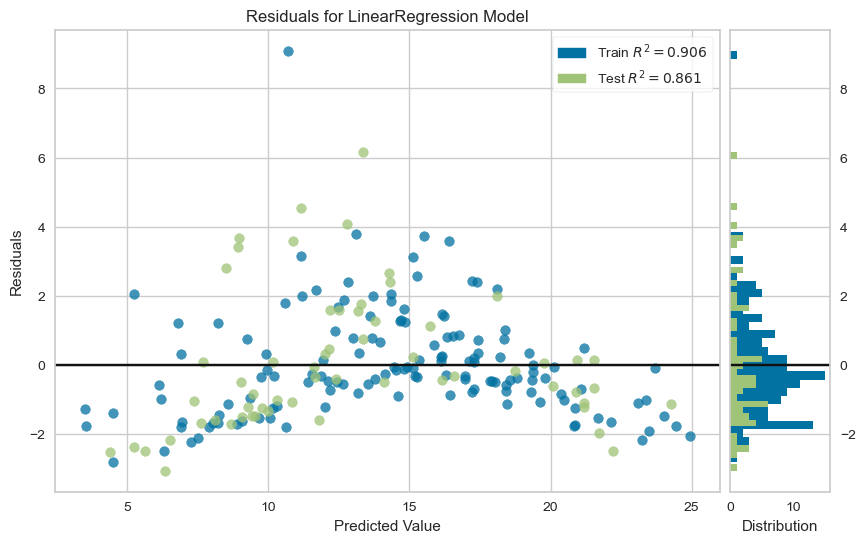

In [ ]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure
# fit ve score'ları alıp plot return ediyor

## Prediction Error for LinearRegression

In [ ]:
from yellowbrick.regressor import PredictionError

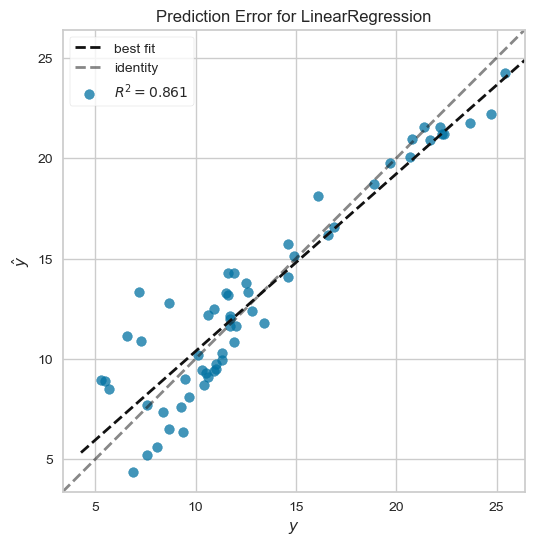

In [ ]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# grafikteki  45 derecelik silik çizgi ideal fit line  diğeride bizim hesapladığımız best fit R2_score = 0.861

## Retraining Model on Full Data

Tüm datayı eğitim modeline veriyoruz modelimizin datanın hepsinde nasıl sonuç verecek  

In [ ]:
final_model = LinearRegression()
final_model.fit(X, y) 

LinearRegression()

In [ ]:
# Coefficients katsayıları
final_model.coef_

#final_model.intercept_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
final_model.intercept_

2.9388893694594085

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )


In [ ]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [ ]:
adv = [[150,20,15]] # yeni data ile tahmin yapıyoruz, test eğitim datalaır kaç boyutlu ise yeni tahmin datasıda aynı boyutta olacak iki boyutlu olduğu için [[]] paratez ile return ederiz

In [ ]:
adv

[[150, 20, 15]]

In [ ]:
final_model.predict(adv)

array([13.55862413])

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
final_model.intercept_

2.9388893694594085

In [ ]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  # yeni datanın değerini manuel olarak salamasını yaptık.

13.558624130495994

In [ ]:
adv_2 = [[150, 20, 15], [160, 20, 15]] # iki data verdik fakat ikinci data da 150 yerine 160 

In [ ]:
final_model.predict(adv_2) # ikindi data 10 birim arttı (tv feature) 

array([13.55862413, 14.01627059])

In [ ]:
14.01627059 - 13.55862413 # tv nin coef degeri 10 kat arttı 0.04576464 ==> 0.457464 oldu

0.4576464599999994

## The effect of features on the predicted label

In [ ]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [ ]:
coeff_df.Coefficient 

TV           0.045765
radio        0.188530
newspaper   -0.001037
Name: Coefficient, dtype: float64

In [ ]:
adv[0]

[150, 20, 15]

In [ ]:
coeff_df.Coefficient * adv[0]

TV           6.864697
radio        3.770600
newspaper   -0.015562
Name: Coefficient, dtype: float64

In [ ]:
6.864697 / 13.55862413

0.5062974630892729

In [ ]:
3.770600 / 13.55862413

0.2780960637191142

In [ ]:
-0.015562 / 13.55862413

-0.0011477565755043907